In [ ]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(stringr)
library(lubridate)
library(stringr)


In [100]:
# Load raw CSV and clean header
raw_data <- read.csv("messy_ice_detention.csv", header = FALSE)
head(raw_data,10)

,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,,,,,,,
2,"These statistics are made available to the public pursuant to H.R. 1158 Sec. 218 - Department of Homeland Security Appropriations Act, 2020. ) *The information in this report is subject to change.",,,,,,,
3,"ICE FACILITIES DATA, FY25",,,,,,,
4,"ICE Enforcement and Removal Operations Data, FY2025",,,,,,,
5,"This list is limited to facilities that have a population count of greater than or equal to 1 as the time of the data pull. This list does not include HOLD, HOSPITAL, HOTEL, ORR, or MIRP facilities.",,,,,,,
6,"Data Source: ICE Integrated Decision Support (IIDS), 03/17/2025",,,,,,,
7,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
8,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
9,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491


In [101]:
# Remove initial meta rows and set column names
data_clean <- raw_data[-c(1:6), ]
colnames(data_clean) <- as.character(unlist(data_clean[1, ]))
data_clean <- data_clean[-1, ]
rownames(data_clean) <- NULL
head(data_clean)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
2,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
3,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
4,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
5,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NA
6,ALL%EN PARISH PUBLIC SAFETY +COMPLEX,OBERLIN,LA,101.3113772,30.25149701,33.76646707,10.66467066,45638


In [102]:
check_problematic_rows <- function(data) {
  data %>%
    mutate(
      # Clean the text columns to UTF-8 encoding
      Name = iconv(Name, from = "", to = "UTF-8", sub = ""),
      City = iconv(City, from = "", to = "UTF-8", sub = ""),
      State = iconv(State, from = "", to = "UTF-8", sub = ""),
      
      # Combine all issues into a single column 'issue'
      issue = case_when(
        # Special character issues
        str_detect(Name, "[^a-zA-Z0-9\\s]") ~ "Special char in Name",
        str_detect(City, "[^a-zA-Z0-9\\s]") ~ "Special char in City",
        str_detect(State, "[^a-zA-Z0-9\\s]") ~ "Special char in State",
        
        # Missing or invalid values issues
        is.na(Name) | str_trim(Name) == "" | tolower(str_trim(Name)) %in% c("n/a", "null") ~ "Missing/Invalid Name",
        is.na(City) | str_trim(City) == "" | tolower(str_trim(City)) %in% c("n/a", "null") ~ "Missing/Invalid City",
        is.na(State) | str_trim(State) == "" | tolower(str_trim(State)) %in% c("n/a", "null") ~ "Missing/Invalid State",
        
        TRUE ~ NA_character_ # Return NA if no issue
      )
    ) %>%
    # Filter rows where there is any issue
    filter(!is.na(issue))
}




In [103]:
problematic_rows <- check_problematic_rows(data_clean)

# View
problematic_rows

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,issue
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533,Special char in Name
ALL%EN PARISH PUBLIC SAFETY +COMPLEX,OBERLIN,LA,101.3113772,30.25149701,33.76646707,10.66467066,45638,Special char in Name
ATLANTAUSPEN,ATLANTA,,17.34131737,3.610778443,3.053892216,2.724550898,N/A,Missing/Invalid State
B^AKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.22155689,38.64071856,88.65269461,88.73053892,45589,Special char in Name
BERLIN FED. CORR. INST.,BERLIN,NH,1.748502994,8.98E-02,0.97005988,0.71257485,N/A,Special char in Name
BROWARD COUNTY JAIL,FT.LAUDERDALE,FL,0.335329341,0.209580838,1.053892216,0.233532934,N/A,Special char in City
CALHOUN C(OUNTY CORRECTIONAL CENTER,BATTLE CREEK,MI,56.78443114,35.29341317,30.98203593,15.95209581,45526,Special char in Name
"CCA, FLORENCE CORRECTIONAL CENTER",FLORENCE,AZ,50.4491018,40.62275449,145.2215569,141.742515,45638,Special char in Name
CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.9700599,221.2095808,344.7904192,207.1616766,45666,Special char in Name


In [104]:
data_clean <- data_clean %>%
    mutate(
    Name = Name %>%
      str_replace_all("[^a-zA-Z0-9\\s\\(\\)-]", "") %>%  # Remove unwanted special characters
      str_replace_all("\\([^\\)]*$", "") %>%             # Remove unmatched opening parenthesis at end
      str_replace_all("^[^\\(]*\\)", "") %>%             # Remove unmatched closing parenthesis at beginning
      str_squish(),                                       # Clean up extra spaces
    
    City = City %>%
      str_replace_all("[^a-zA-Z0-9\\s\\(\\)-]", "") %>%  # Remove unwanted special characters
      str_replace_all("^([^\\)]*)\\(", "\\1") %>%             # Remove unmatched opening parenthesis at end
      str_replace_all("\\)([^\\(]*)$", "\\1") %>%             # Remove unmatched closing parenthesis at beginning
      str_squish(),                                       # Clean up extra spaces
      
    State = State %>%
      str_replace_all("[^a-zA-Z0-9\\s\\(\\)-]", "") %>%  # Remove unwanted special characters
      str_replace_all("^([^\\)]*)\\(", "\\1") %>%             # Remove unmatched opening parenthesis at end
      str_replace_all("\\)([^\\(]*)$", "\\1") %>%             # Remove unmatched closing parenthesis at beginning
      str_squish()
  )

In [105]:
data_clean

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NA
ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.3113772,30.25149701,33.76646707,10.66467066,45638
ATLANTAUSPEN,ATLANTA,,17.34131737,3.610778443,3.053892216,2.724550898,N/A
BAKER COUNTY SHERIFF DEPT,MACCLENNY,FL,26.22155689,38.64071856,88.65269461,88.73053892,45589
BERLIN FED CORR INST,BERLIN,NH,1.748502994,8.98E-02,0.97005988,0.71257485,N/A


In [106]:
problematic_rows <- check_problematic_rows(data_clean)

# View
problematic_rows

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,issue
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ATLANTAUSPEN,ATLANTA,,17.34131737,3.610778443,3.053892216,2.724550898,N/A,Missing/Invalid State
CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.9700599,221.2095808,344.7904192,207.1616766,45666,Special char in Name
DALLAS COUNTY JAIL - LEW STERRETT JUSTICE CENTER,DALLAS,TX,6.832335329,0,1.20E-02,5.99E-03,45491,Special char in Name
ETOWAH COUNTY JAIL (ALABAMA),GADSDEN,AL,1.083832335,1.251497006,1.125748503,0.341317365,44533,Special char in Name
GEAUGA COUNTY JAIL,,OH,24.67664671,13.05988024,7.580838323,2.694610778,45687,Missing/Invalid City
IAH SECURE ADULT DETENTION FACILITY (POLK),LIVINGSTON,TX,679.4071856,67.04191617,28.82035928,11.74850299,45701,Special char in Name
LA SALLE COUNTY REGIONAL DETENTION CENTER,ENCINAL,,8.910179641,0.706586826,0,7.19E-02,45695,Missing/Invalid State
MONROE COUNTY DETENTION-DORM,MONROE,MI,63.53293413,15.69461078,1.934131737,1.113772455,45729,Special char in Name
ORANGE COUNTY JAIL (FL),ORLANDO,FL,1.892215569,1.556886228,2.670658683,1.365269461,45519,Special char in Name


In [107]:
check_missing_or_invalid <- function(df, column_name) {
  col <- df[[column_name]]
  
  invalid_indices <- which(
    is.na(col) |
    col == "" |
    str_trim(col) == "" |
    tolower(str_trim(col)) %in% c("n/a", "na", "null")
  )
  
  return(df[invalid_indices, ])
}

In [108]:
check_missing_or_invalid(data_clean, "Name")

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
117,,ELK RIVER,MN,4.592814371,5.598802395,9.281437126,2.760479042,45414
124,,DOVER,NH,0,0,49.16167665,41.33532934,45547


In [109]:
data_clean <- data_clean %>%
  mutate(Name = case_when(
    City == "ELK RIVER" & State == "MN" & (is.na(Name) | str_trim(Name) == "") ~ "Sherburne County Jail",
    City == "DOVER" & State == "NH" & (is.na(Name) | str_trim(Name) == "") ~ "Strafford County Corrections",
    TRUE ~ Name
  ))

In [110]:
check_missing_or_invalid(data_clean, "Name")

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [111]:
check_missing_or_invalid(data_clean, "City")


,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
52,GEAUGA COUNTY JAIL,,OH,24.67664671,13.05988024,7.580838323,2.694610778,45687


In [112]:
data_clean <- data_clean %>%
  mutate(City = case_when(
    Name == "GEAUGA COUNTY JAIL" & State == "OH" & (is.na(City) | str_trim(City) == "") ~ "CHARDON",
    TRUE ~ City
  ))

In [113]:
check_missing_or_invalid(data_clean, "City")


Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [114]:
check_missing_or_invalid(data_clean, "State")


,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,ATLANTAUSPEN,ATLANTA,,17.34131737,3.610778443,3.053892216,2.724550898,N/A
72,LA SALLE COUNTY REGIONAL DETENTION CENTER,ENCINAL,,8.910179641,0.706586826,0,7.19E-02,45695


In [115]:
data_clean <- data_clean %>%
  mutate(State = case_when(
    Name == "ATLANTAUSPEN" & (is.na(State) | str_trim(State) == "") ~ "GA",
    Name == "LA SALLE COUNTY REGIONAL DETENTION CENTER" & (is.na(State) | str_trim(State) == "") ~ "TX",
    TRUE ~ State
  ))


In [116]:
check_missing_or_invalid(data_clean, "State")

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [117]:
summary(data_clean)

     Name               City              State             Level A         
 Length:134         Length:134         Length:134         Length:134        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Level B            Level C            Level D         
 Length:134         Length:134         Length:134        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
 Last Inspection End Date
 Length:134              
 Class :character        
 Mode  :character        

In [118]:
# Convert population columns to numeric
data_clean <- data_clean %>%
  mutate(
    `Level A` = as.numeric(`Level A`),
    `Level B` = as.numeric(`Level B`),
    `Level C` = as.numeric(`Level C`),
    `Level D` = as.numeric(`Level D`)
  )

In [119]:
summary(data_clean)

     Name               City              State              Level A        
 Length:134         Length:134         Length:134         Min.   :   0.000  
 Class :character   Class :character   Class :character   1st Qu.:   2.099  
 Mode  :character   Mode  :character   Mode  :character   Median :  16.620  
                                                          Mean   : 182.847  
                                                          3rd Qu.: 209.656  
                                                          Max.   :1876.461  
    Level B           Level C           Level D        
 Min.   :  0.000   Min.   :  0.000   Min.   :  0.0000  
 1st Qu.:  1.585   1st Qu.:  1.259   1st Qu.:  0.7141  
 Median :  7.787   Median :  7.608   Median :  4.8204  
 Mean   : 40.089   Mean   : 44.752   Mean   : 33.9839  
 3rd Qu.: 38.261   3rd Qu.: 39.250   3rd Qu.: 35.5524  
 Max.   :561.425   Max.   :542.275   Max.   :402.0599  
 Last Inspection End Date
 Length:134              
 Class :character

In [120]:
# Handle inspection date format
data_clean <- data_clean %>%
  mutate(
    `Last Inspection End Date` = case_when(
      tolower(trimws(`Last Inspection End Date`)) %in% c("na", "n/a", "", "null") ~ NA_character_,
      TRUE ~ str_trim(`Last Inspection End Date`)
    )
  ) %>%
  mutate(
    `Last Inspection End Date` = case_when(
      grepl("^\\d{1,2}/\\d{1,2}/\\d{4}$", `Last Inspection End Date`) ~
        as.character(mdy(`Last Inspection End Date`)),
      grepl("^\\d{5}$", `Last Inspection End Date`) ~
        as.character(as.Date(as.numeric(`Last Inspection End Date`), origin = "1899-12-30")),
      TRUE ~ `Last Inspection End Date`
    ),
    `Last Inspection End Date` = as.Date(`Last Inspection End Date`)
  )

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
i In argument: `Last Inspection End Date = case_when(...)`.
Caused by warning:
!  116 failed to parse.
i Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


In [121]:
data_clean

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.4610780,266.4311377,6.7245509,4.2574850,2025-01-16
ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.4011976,4.3233533,22.6047904,32.6347305,2024-07-18
ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.3293413,3.4610778,6.0838323,6.1856287,2024-09-19
ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.4131736,76.0059880,52.4850299,2024-08-29
ALLEGANY COUNTY JAIL,BELMONT,NY,1.2215569,0.0180000,0.0000000,0.0000000,NA
ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.3113772,30.2514970,33.7664671,10.6646707,2024-12-12
ATLANTAUSPEN,ATLANTA,GA,17.3413174,3.6107784,3.0538922,2.7245509,NA
BAKER COUNTY SHERIFF DEPT,MACCLENNY,FL,26.2215569,38.6407186,88.6526946,88.7305389,2024-10-24
BERLIN FED CORR INST,BERLIN,NH,1.7485030,0.0898000,0.9700599,0.7125748,NA


In [122]:
data_clean <- data_clean %>%
  mutate(`Total Population` = `Level A` + `Level B` + `Level C` + `Level D`)

In [123]:
top_10_facilities <- data_clean %>%
  arrange(desc(`Total Population`)) %>%
  slice(1:10)

top_10_facilities

Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Population
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.4611,266.43114,6.724551,4.257485,2025-01-16,2153.874
SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1299.0838,106.12575,188.724551,68.197605,2025-02-06,1662.132
STEWART DETENTION CENTER,LUMPKIN,GA,743.3114,194.92814,371.562874,328.041916,2024-08-01,1637.844
WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.0240,214.77246,187.005988,94.580838,2025-01-16,1509.383
OTAY MESA DETENTION CENTER,SAN DIEGO,CA,800.8263,470.11976,45.479042,46.215569,2024-11-07,1362.641
ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1041.8862,45.53892,114.688623,125.610778,2024-10-31,1327.725
MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,205.2455,96.46707,542.275449,402.059880,2025-03-06,1246.048
MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,149.5569,561.42515,355.269461,160.976048,2024-12-05,1227.228
CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.9701,221.20958,344.790419,207.161677,2025-01-09,1184.132


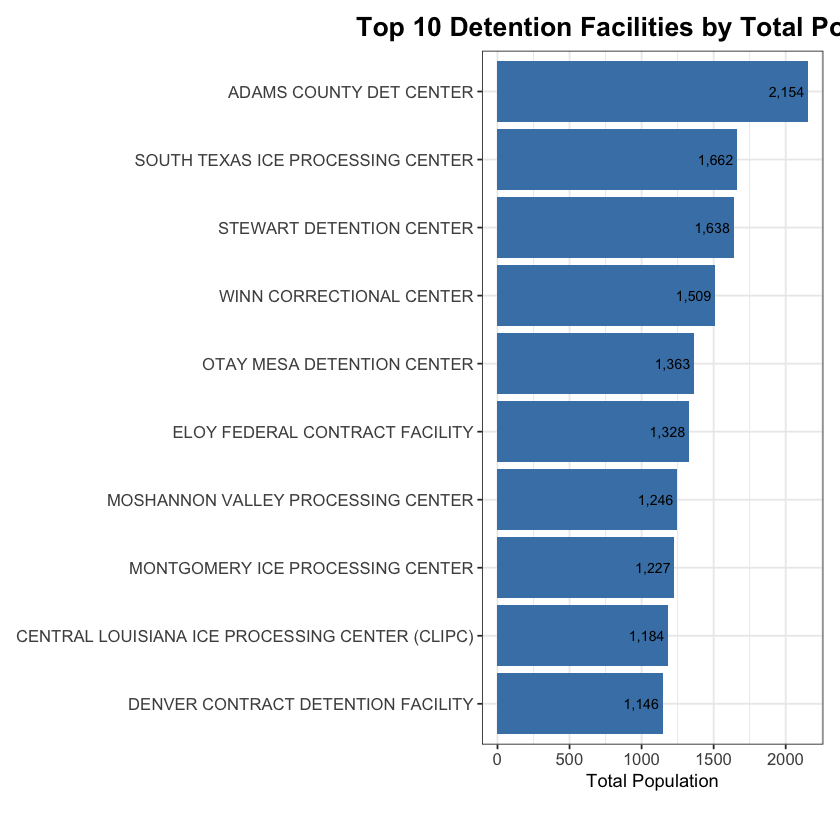

In [124]:
library(ggplot2)

ggplot(top_10_facilities, aes(x = reorder(Name, `Total Population`), y = `Total Population`)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Bar chart
  coord_flip() +  # Flip for better readability
  geom_text(aes(label = scales::comma(`Total Population`)), hjust = 1.1, size = 3) +  # Add population as text labels
  labs(
    title = "Top 10 Detention Facilities by Total Population",  # Title
    x = NULL,  # Remove x-axis label
    y = "Total Population"
  ) +
  theme_bw() +  # White background
  theme(
    axis.text.x = element_text(size = 10),  # Font size for x-axis
    axis.text.y = element_text(size = 10),  # Font size for y-axis
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),  # Center and enlarge title
    plot.margin = margin(10, 10, 30, 10)  # Increase bottom margin to fit title
  )



In [126]:
ggsave("top_10_detention_facilities.png", width = 10, height = 6)